In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [3]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ravali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ravali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
df = pd.read_csv("C:/Users/Ravali/Downloads/TASK 4/spam.csv", encoding='latin-1')
df = df[['v1','v2']]        # keep only useful columns
df = df.rename(columns={'v1':'label','v2':'message'})


In [7]:
df['label_num'] = df['label'].map({'ham':0, 'spam':1})

In [9]:
ps = PorterStemmer()

In [11]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)               # tokenize
    text = [word for word in text if word.isalnum()]
    text = [word for word in text if word not in stopwords.words('english')]
    text = [ps.stem(word) for word in text]
    return " ".join(text)


In [13]:

df['transformed'] = df['message'].apply(transform_text)

In [14]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed']).toarray()
y = df['label_num']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



📊 Naive Bayes Performance:
Accuracy: 0.9757847533632287
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       0.99      0.83      0.90       149

    accuracy                           0.98      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



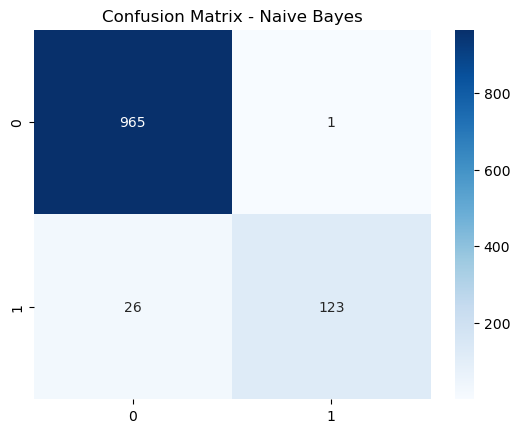

In [ ]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n📊 {name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()